Heart Health Prediction

Importing data from health1.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
df = pd.read_csv(r'C:\Users\vidhya\Documents\my folder\heart health 1\hearthealthprediction\health1.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


Data Cleansing

Listing Null Values from Data

In [6]:
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


Dropping Null values because Null values are very less as compared to data size

In [7]:
df=df.dropna()

Data Visualization

Give the info of Data Type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     301 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.3+ KB


Describing the whole Data

In [9]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000
mean,54.451827,0.681063,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.69103,0.458472
std,9.067258,0.466841,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.94915,0.499102
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.00000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.00000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,1.000000


Pandas Profiling Provide the Report of data set including Corelation

In [10]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

C:\Users\vidhya\AppData\Local\Temp\ipykernel_8740\1118840070.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
d=df['Target'].value_counts()
print(d)

Target
0    163
1    138
Name: count, dtype: int64


Heart Diseases Ratio in Dataset

Blue Graph indicate no heart diesase and Orange Graph show Heart disease

C:\Users\vidhya\AppData\Local\Temp\ipykernel_12036\45456739.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, ax=ax, palette=["blue", "orange"])


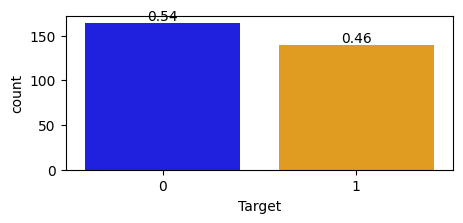

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

df = pd.read_csv(r'C:\Users\vidhya\Documents\my folder\heart health 1\hearthealthprediction\health1.csv')

def plotTarget(ax):
    sns.countplot(x='Target', data=df, ax=ax, palette=["blue", "orange"])
    for i, p in enumerate(ax.patches):
        count = df['Target'].value_counts().values[i]
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height() + 3
        label = '{:1.2f}'.format(count / float(df.shape[0]))
        ax.text(x, y, label, ha='center')

fig_target, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
plotTarget(ax)
plt.show()

Checking the corelation of data

In [21]:
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.corr().to_string())

              Age       Sex    RestBP      Chol       Fbs   RestECG     MaxHR     ExAng   Oldpeak     Slope        Ca    Target
Age      1.000000 -0.097542  0.284946  0.208950  0.118530  0.148868 -0.393806  0.091661  0.203805  0.161770  0.332340  0.223120
Sex     -0.097542  1.000000 -0.064456 -0.199915  0.047862  0.021647 -0.048663  0.146201  0.102173  0.037533  0.101598  0.276816
RestBP   0.284946 -0.064456  1.000000  0.130120  0.175340  0.146560 -0.045351  0.064762  0.189171  0.117382  0.101357  0.150825
Chol     0.208950 -0.199915  0.130120  1.000000  0.009841  0.171043 -0.003432  0.061310  0.046564 -0.004062  0.109179  0.085164
Fbs      0.118530  0.047862  0.175340  0.009841  1.000000  0.069564 -0.007854  0.025665  0.005747  0.059894  0.158021  0.025264
RestECG  0.148868  0.021647  0.146560  0.171043  0.069564  1.000000 -0.083389  0.084867  0.114133  0.133946  0.126633  0.169202
MaxHR   -0.393806 -0.048663 -0.045351 -0.003432 -0.007854 -0.083389  1.000000 -0.378103 -0.343085 -0.385

Select Age as most dependent data on label

Disease Probability Bar Plot

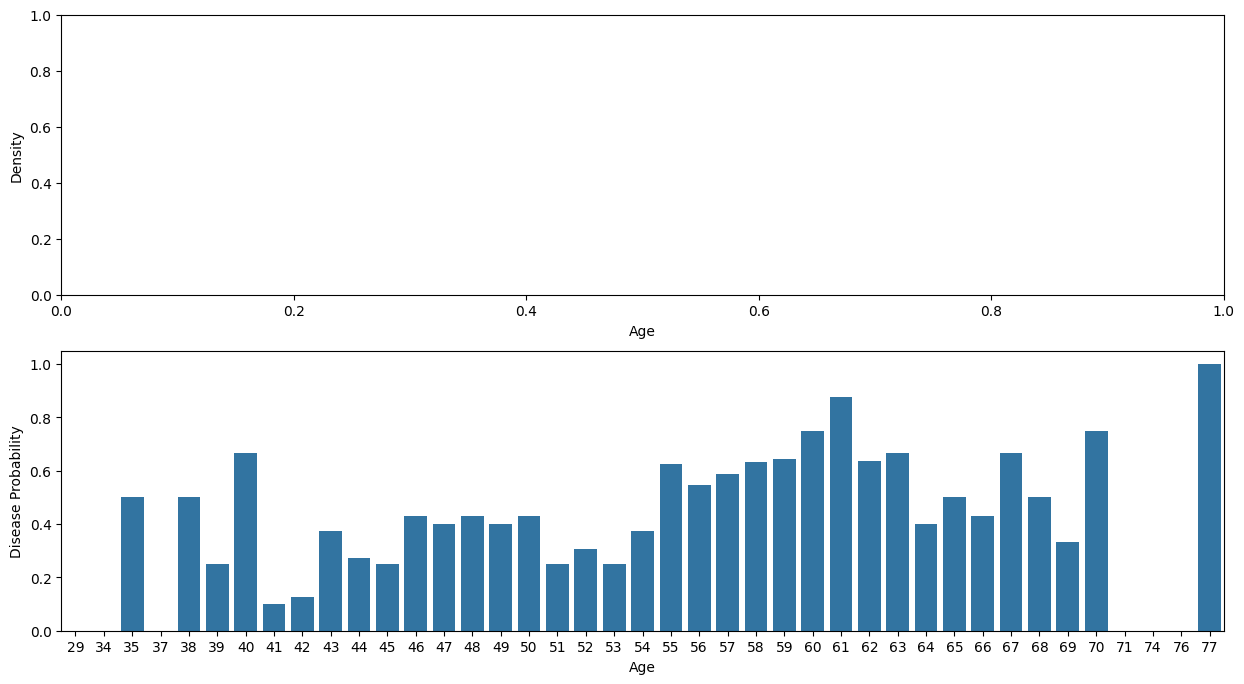

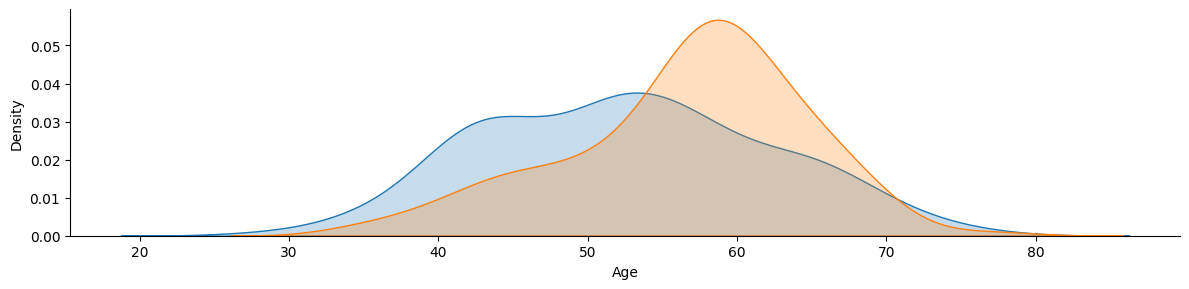

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

def plotAge():
    facet_grid = sns.FacetGrid(df, hue="Target", aspect=4)
    facet_grid.map(sns.kdeplot, "Age", fill=True)
    
    legend = facet_grid.ax.get_legend()
    if legend:
        legend_labels = ['Disease false', 'Disease true']
        for t, l in zip(legend.texts, legend_labels):
            t.set_text(l)

    axes[0].set(xlabel='Age', ylabel='Density')

    avg = df.groupby("Age", as_index=False)["Target"].mean()
    sns.barplot(x="Age", y="Target", data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='Disease Probability')

plotAge()
plt.tight_layout()
plt.show()


Checking For Categorical Data

In [33]:
x=df['ChestPain']
x.value_counts()

ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

In [34]:
x=df['Thal']
x.value_counts()

Thal
normal        166
reversable    117
fixed          18
Name: count, dtype: int64

Plotting Function For Categorical Data"ChestPain" && "Thalassemia"

Ploting Function For Continous Data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\vidhya\Documents\my folder\heart health 1\hearthealthprediction\health1.csv')

category = [
    ('ChestPain', ['typical', 'nontypical', 'nonanginal', 'asymptomatic']),
    ('Thal', ['fixed', 'normal', 'reversable'])
]

continuous = [
    ('Age', 'Age in year'),
    ('Sex', '1 for Male 0 for Female'),
    ('RestBP', 'BP in Rest State'),
    ('Fbs', 'Fasting blood glucose'),
    ('RestECG', 'ECG at rest'),
    ('Chol', 'serum cholestoral in mg/d'),
    ('MaxHR', 'Max Heart Rate'),
    ('ExAng', 'Exchange Rate'),
    ('Slope', 'Slope of Curve'),
    ('Oldpeak', 'ST depression by exercise relative to rest'), 
    ('Ca', '# major vessels: (0-3) colored by flourosopy')
]

def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='Target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'Target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='Target', hue=attribute, data=avg, ax=axes[ax_index][2])

    if axes[ax_index][1].get_legend() is not None:
        for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
            t.set_text(l)
    
    if axes[ax_index][2].get_legend() is not None:
        for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
            t.set_text(l)

def plotContinuous(attribute, xlabel, ax_index):
    sns.histplot(df[attribute], kde=True, ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='Target', y=attribute, data=df, ax=axes[ax_index][1])

def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(category)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]


Categorical Plot

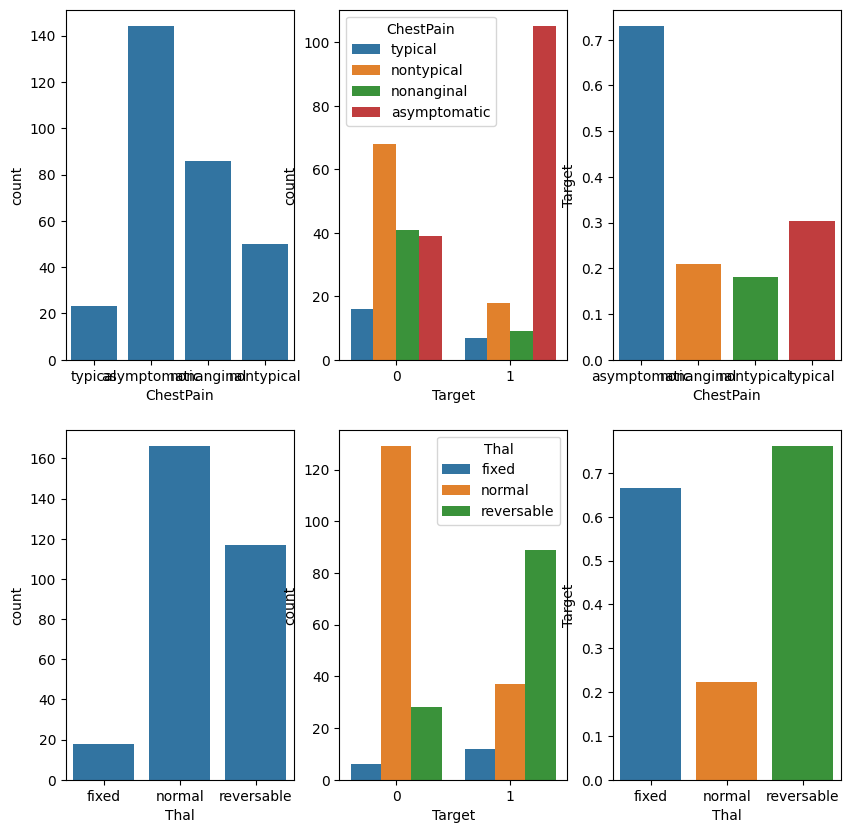

In [39]:
fig_categorial, axes = plt.subplots(nrows=len(category), ncols=3, figsize=(10, 10))
plotGrid(isCategorial=True)
plt.show()

Continous Plot

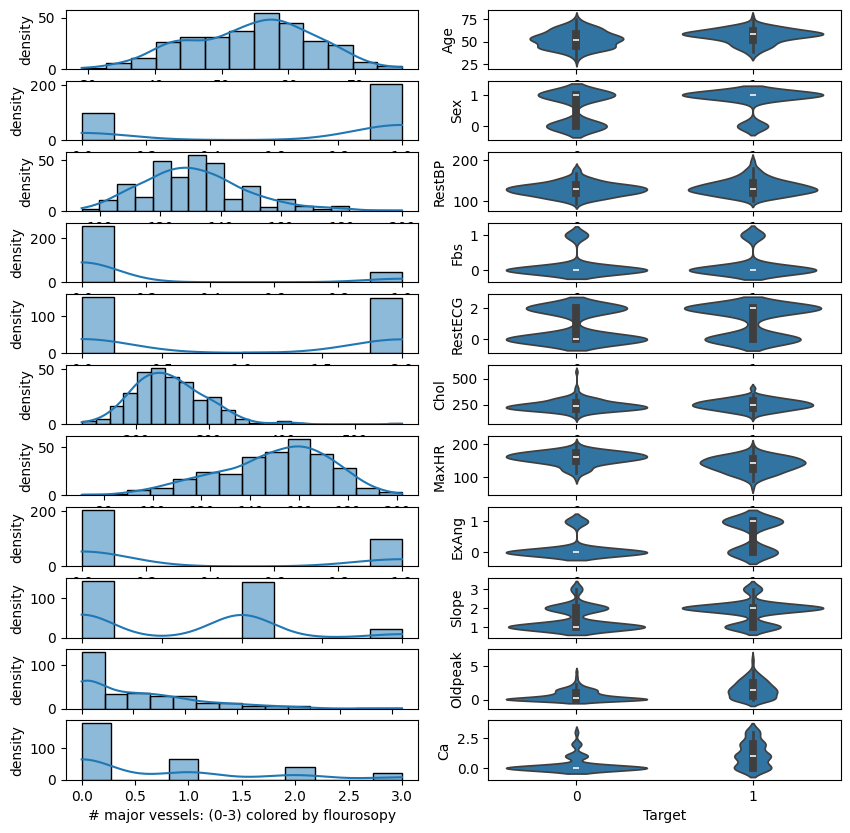

In [40]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(10,10))
plotGrid(isCategorial=False)

Creating Dummy

In [41]:
#dummy for chest Pain
chestpain_dummy = pd.get_dummies(df.loc[:,'ChestPain'])
chestpain_dummy.rename(columns={1: 'Typical', 2: 'Asymptomatic',3: 'Nonanginal', 4: 'Nontypical'}, inplace=True)
#dummy for RestECG
restecg_dummy = pd.get_dummies(df.loc[:,'RestECG'])
restecg_dummy.rename(columns={0: 'Normal_restECG', 1: 'Wave_abnormal_restECG',2:'Ventricular_ht_restECG'},inplace=True)
#dummy for Slope
slope_dummy = pd.get_dummies(df['Slope'])
slope_dummy.rename(columns={1: 'Slope_upsloping', 2:'Slope_flat',3: 'Slope_downsloping'},inplace=True)
#dummy for Thal
thal_dummy = pd.get_dummies(df['Thal'])
thal_dummy.rename(columns={3: 'Thal_Normal', 6: 'Thal_fixed',7: 'Thal_reversible'}, inplace=True)
#concatination in data frame
df = pd.concat([df,chestpain_dummy, restecg_dummy, slope_dummy, thal_dummy], axis=1)
#droping Column because their dummies are created
df.drop(['ChestPain','RestECG', 'Slope', 'Thal'], axis=1, inplace=True)

Checking the No object will left

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    int64  
 2   RestBP                  303 non-null    int64  
 3   Chol                    303 non-null    int64  
 4   Fbs                     303 non-null    int64  
 5   MaxHR                   303 non-null    int64  
 6   ExAng                   303 non-null    int64  
 7   Oldpeak                 303 non-null    float64
 8   Ca                      303 non-null    int64  
 9   Target                  303 non-null    int64  
 10  asymptomatic            303 non-null    bool   
 11  nonanginal              303 non-null    bool   
 12  nontypical              303 non-null    bool   
 13  typical                 303 non-null    bool   
 14  Normal_restECG          303 non-null    bo

Checking dataset

In [43]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Ca,Target,...,typical,Normal_restECG,Wave_abnormal_restECG,Ventricular_ht_restECG,Slope_upsloping,Slope_flat,Slope_downsloping,fixed,normal,reversable
0,63,1,145,233,1,150,0,2.3,0,0,...,True,False,False,True,False,False,True,True,False,False
1,67,1,160,286,0,108,1,1.5,3,1,...,False,False,False,True,False,True,False,False,True,False
2,67,1,120,229,0,129,1,2.6,2,1,...,False,False,False,True,False,True,False,False,False,True
3,37,1,130,250,0,187,0,3.5,0,0,...,False,True,False,False,False,False,True,False,True,False
4,41,0,130,204,0,172,0,1.4,0,0,...,False,False,False,True,True,False,False,False,True,False


Selecting label means selected Column to predict in df_X and input column in df_Y

In [44]:
df_X= df.loc[:, df.columns != 'Target']
df_y= df.loc[:, df.columns == 'Target']

Model Training

Recursive Feature Elimination

In [52]:
import warnings
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

selected_features = []
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=20)

warnings.simplefilter('ignore')
rfe.fit(df_X.values, df_y.values)

print(rfe.support_)
print(rfe.ranking_)

for i, feature in enumerate(df_X.columns.values):
    if rfe.support_[i]:
        selected_features.append(feature)

df_selected_X = df_X[selected_features]
df_selected_y = df_y

df_selected_X = sm.add_constant(df_selected_X)  # Add intercept for statsmodels

lm = sm.Logit(df_selected_y, df_selected_X)
result = lm.fit()

print(result.summary2())

warnings.simplefilter('ignore')


[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.391645
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Target           Pseudo R-squared: 0.432     
Date:               2025-02-14 21:13 AIC:              261.3370  
No. Observations:   303              BIC:              305.9018  
Df Model:           11               Log-Likelihood:   -118.67   
Df Residuals:       291              LL-Null:          -208.99   
Converged:          1.0000           LLR p-value:      7.5433e-33
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -3.6146     2.4469   -1.

 Spliting Values into test and traning Dataset in the ratio 0.75:0.25

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(df_selected_X,df_selected_y, test_size = 0.25, random_state =0)
columns = X_train.columns

Calculating Accuracy Function of the Models

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.3f}")

 Logistic Regression

In [56]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
print(f"Accuracy of Test Dataset: {lr.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {lr.score(X_train,y_train):0.3f}")
warnings.simplefilter('ignore')

Accuracy of Test Dataset: 0.737
Accuracy of Train Dataset: 0.841


Vale Prediction for Test dataset for Logistic Regression

In [60]:
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1
 1 1]

Confusion Matrix: 
 [[33  7]
 [13 23]]

Accuracy : 73.684


 Support Vector Machine

In [58]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {svm_linear.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {svm_linear.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.737
Accuracy of Train Dataset: 0.841


 Vale Prediction for Test dataset for SVM

In [59]:
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1
 1 1]

Confusion Matrix: 
 [[33  7]
 [13 23]]

Accuracy : 73.684


 Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
gini.fit(X_train, y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {gini.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {gini.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.671
Accuracy of Train Dataset: 0.819


Vale Prediction for Test dataset for Decision Tree

In [62]:
y_predict=gini.predict(X_test) 
print("Predicted values:\n")
print(y_predict) 
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0
 1 0]

Confusion Matrix: 
 [[36  4]
 [21 15]]

Accuracy : 67.105


 Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {forest.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {forest.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.737
Accuracy of Train Dataset: 1.000


Over Fitting Issue

Value Prediction for Test dataset for Random Forest

In [64]:

y_predict=forest.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1
 1 1]

Confusion Matrix: 
 [[32  8]
 [12 24]]

Accuracy : 73.684


# Cross Validation For Models

In [66]:
from sklearn import model_selection
import warnings

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)  # Fixed

models = [
    ('Linear Regression', lr),
    ('Support Vector Machine', svm_linear),
    ('Decision Tree', gini),
    ('Random Forest', forest)
]

warnings.simplefilter('ignore')

for model in models:
    results = model_selection.cross_val_score(model[1], X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}:: {results.mean():.3f}")


Cross validated Accuracy of Linear Regression:: 0.801
Cross validated Accuracy of Support Vector Machine:: 0.810
Cross validated Accuracy of Decision Tree:: 0.744
Cross validated Accuracy of Random Forest:: 0.815


In [67]:
models=pd.DataFrame({'Model':['Logistics Regression','SVM','Decision Tree','Random Forest'],
                     'Traning Accuracy':[(lr.score(X_train,y_train)),svm_linear.score(X_train,y_train),gini.score(X_train,y_train),forest.score(X_train,y_train)],
                     'Test Accuracy':[(lr.score(X_test,y_test)),svm_linear.score(X_test,y_test),gini.score(X_test,y_test),forest.score(X_test,y_test)]})
models.sort_values(by='Test Accuracy', ascending=False)

,Model,Traning Accuracy,Test Accuracy
0,Logistics Regression,0.841410,0.736842
1,SVM,0.841410,0.736842
3,Random Forest,1.000000,0.736842
2,Decision Tree,0.819383,0.671053


 Best Model for Dataset is Linear Regression